In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/customer_service_faqs.csv")

In [5]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


### Data cleaning

In [6]:
import pandas as pd
import json

# Keep only necessary columns
df = df[['instruction', 'category', 'intent', 'response']].rename(
    columns={'instruction': 'question', 'response': 'answer'}).copy()


In [7]:
df.isna().sum()

question    0
category    0
intent      0
answer      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(26872, 4)

In [10]:
df["intent"].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

### EDA

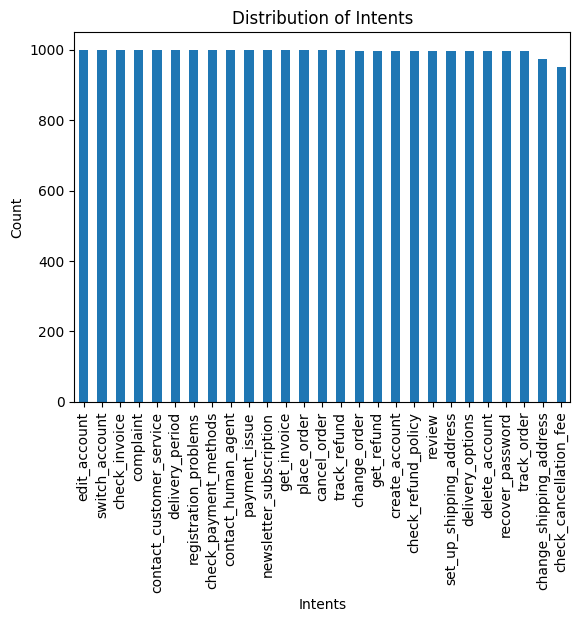

In [21]:
ax = df['intent'].value_counts().plot(kind='bar')
ax.set_xlabel('Intents')
ax.set_ylabel('Count')  # Optional: Label y-axis
ax.set_title('Distribution of Intents')  # Optional: Add a title

# ✅ Show the plot
plt.show()

In [23]:
intent_counts = df["intent"].value_counts()
intent_stats = intent_counts.describe()
print(intent_stats)

count      27.000000
mean      995.259259
std        10.368564
min       950.000000
25%       997.000000
50%       998.000000
75%       999.000000
max      1000.000000
Name: count, dtype: float64


### Convert to json to be faqs document

In [22]:
# Save the filtered dataset
df.to_json("../data/faqs.json", orient="records", indent=4)

for less memory usage option

In [21]:
# Ensure equal sampling: 100 rows per intent
df_limited = df.groupby("intent").apply(lambda x: x.sample(n=min(10, len(x)), random_state=42)).reset_index(drop=True)

# Save the filtered dataset
df_limited.to_json("../data/limited_faqs.json", orient="records", indent=4)

# Show final dataset shape
print(f"✅ New dataset size: {df_limited.shape}")

✅ New dataset size: (270, 4)


/var/folders/g6/vt2sjvcd44q0w58x71z18qvc0000gn/T/ipykernel_34393/485521903.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_limited = df.groupby("intent").apply(lambda x: x.sample(n=min(10, len(x)), random_state=42)).reset_index(drop=True)
